In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss, acf, acovf, pacf
import datetime as dt

from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tools.eval_measures import rmse, meanabs

import seaborn as sns
from statsmodels.stats.diagnostic import het_arch

In [120]:
NASDAQ = yf.download("^IXIC", interval='1m', start="2025-01-23", end="2025-01-31",auto_adjust=False,multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


In [121]:
NASDAQ.head()

,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,
2025-01-23 14:30:00+00:00,19896.875000,19896.875000,19913.585938,19896.875000,19909.755859,0
2025-01-23 14:31:00+00:00,19904.250000,19904.250000,19913.515625,19901.736328,19904.447266,46294360
2025-01-23 14:32:00+00:00,19901.078125,19901.078125,19905.906250,19894.414062,19896.449219,55436607
2025-01-23 14:33:00+00:00,19917.328125,19917.328125,19917.328125,19899.080078,19905.759766,32730068
2025-01-23 14:34:00+00:00,19924.677734,19924.677734,19926.388672,19908.804688,19911.781250,34688694


In [122]:
NASDAQ.shape

(2325, 6)

In [54]:
type(NASDAQ['Adj Close'])

pandas.core.series.Series

In [123]:
NASDAQ.to_csv("NASDAQ_1m_7d.csv", sep=",")

In [2]:
NASDAQ = pd.read_csv("NASDAQ_1m_7d.csv", sep=",")
NASDAQ.head()

,Adj Close
0,19896.875000
1,19904.250000
2,19901.078125
3,19917.328125
4,19924.677734


In [3]:
NASDAQ.head(10)
NASDAQ.columns

Index(['Adj Close'], dtype='object')

In [4]:
NASDAQ.index = pd.date_range(start="2025-01-23", periods=len(NASDAQ), freq="min")
NASDAQ.head(10)

,Adj Close
2025-01-23 00:00:00,19896.875000
2025-01-23 00:01:00,19904.250000
2025-01-23 00:02:00,19901.078125
2025-01-23 00:03:00,19917.328125
2025-01-23 00:04:00,19924.677734
2025-01-23 00:05:00,19935.583984
2025-01-23 00:06:00,19929.367188
2025-01-23 00:07:00,19915.785156
2025-01-23 00:08:00,19922.304688
2025-01-23 00:09:00,19938.320312


In [5]:
NASDAQ['return_NASDAQ'] = (NASDAQ['Adj Close']/NASDAQ['Adj Close'].shift(1)-1)*100
NASDAQ.head(10)

,Adj Close,return_NASDAQ
2025-01-23 00:00:00,19896.875000,NaN
2025-01-23 00:01:00,19904.250000,0.037066
2025-01-23 00:02:00,19901.078125,-0.015936
2025-01-23 00:03:00,19917.328125,0.081654
2025-01-23 00:04:00,19924.677734,0.036901
2025-01-23 00:05:00,19935.583984,0.054737
2025-01-23 00:06:00,19929.367188,-0.031184
2025-01-23 00:07:00,19915.785156,-0.068151
2025-01-23 00:08:00,19922.304688,0.032735
2025-01-23 00:09:00,19938.320312,0.080390


<Axes: >

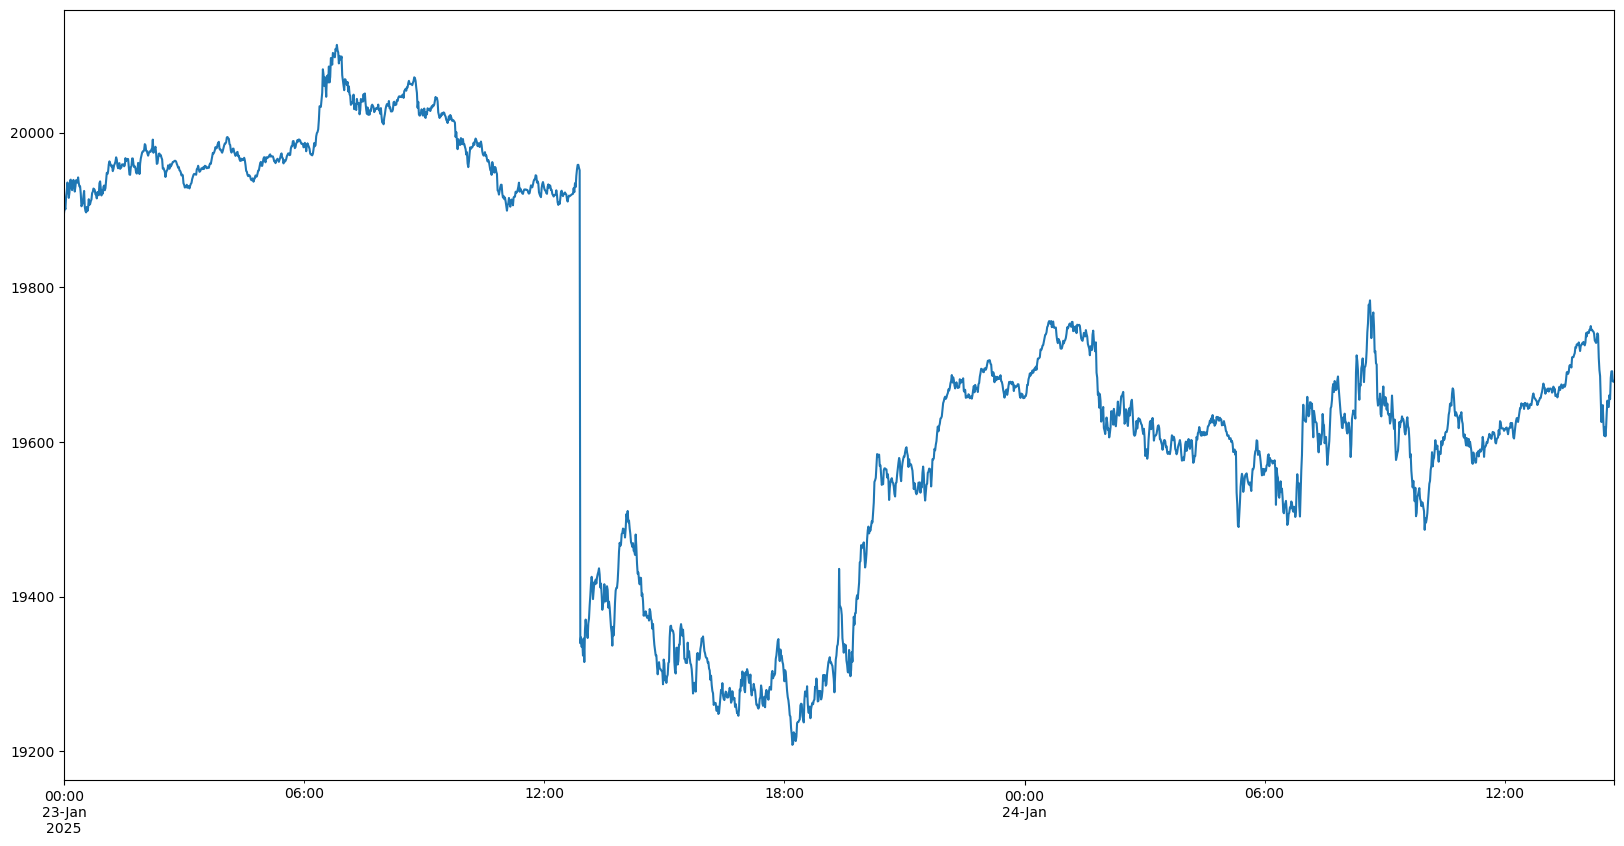

In [6]:
NASDAQ['Adj Close'].plot(figsize=(20,10))

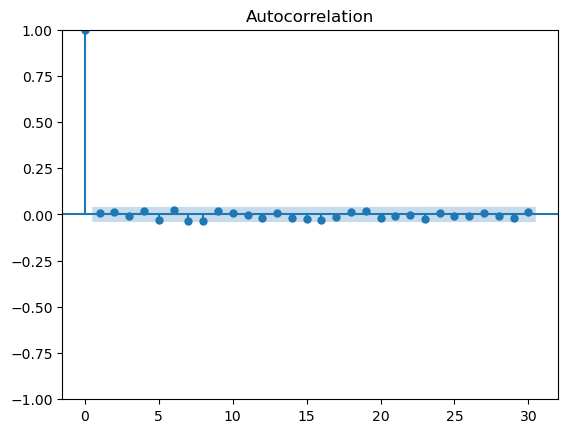

In [11]:
NDX= NASDAQ['return_NASDAQ'].dropna()
plot_acf(NDX,  alpha=.05, lags=30)
plt.show()

In [12]:
coef_ac, confid_int = acf(NDX, nlags=30, alpha=.05)
confid_int

array([[ 1.        ,  1.        ],
       [-0.03072605,  0.05058696],
       [-0.02805734,  0.05326368],
       [-0.04878277,  0.03255117],
       [-0.02448552,  0.05685378],
       [-0.0716246 ,  0.00973598],
       [-0.01609851,  0.06533985],
       [-0.07842066,  0.0030669 ],
       [-0.07475512,  0.00684754],
       [-0.02075331,  0.06094271],
       [-0.03145617,  0.05027252],
       [-0.04190355,  0.0398323 ],
       [-0.05762233,  0.0241136 ],
       [-0.03540598,  0.04635266],
       [-0.06100314,  0.02075792],
       [-0.06492805,  0.01686575],
       [-0.06886356,  0.01297691],
       [-0.05585601,  0.02604752],
       [-0.02836488,  0.05355658],
       [-0.02124709,  0.06068717],
       [-0.05761887,  0.02434677],
       [-0.05078428,  0.03120368],
       [-0.04452761,  0.03746808],
       [-0.06448565,  0.01751104],
       [-0.03303081,  0.04901035],
       [-0.05046289,  0.03158342],
       [-0.04830654,  0.03374694],
       [-0.03488836,  0.0471694 ],
       [-0.04951565,

In [13]:
for q, element in enumerate(coef_ac):
    if confid_int[q, 0] <= 0 <= confid_int[q, 1]:
        print(q-1)
        break

0


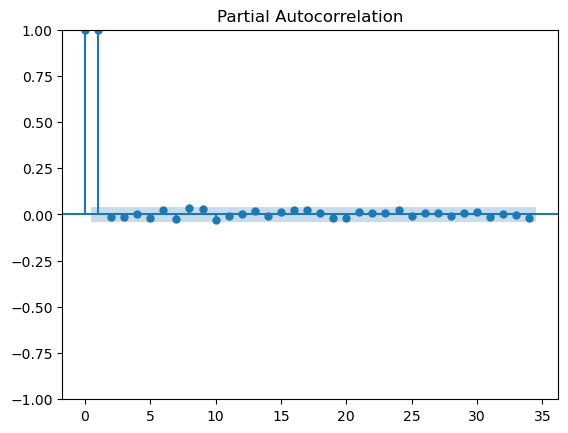

In [14]:
plot_pacf(NASDAQ['Adj Close'],  alpha=.05)
plt.show()

In [15]:
coef_pac, confid_int_pac = pacf(NDX, nlags=10, alpha=.05)

for p, element in enumerate(coef_pac):
    if confid_int_pac[p, 0] <= 0 <= confid_int_pac[p, 1]:
        print(p-1)
        break

0


# $ q = 24$ et $ p = 2$

In [73]:
type(NDX)

pandas.core.series.Series

In [16]:
NASDAQ['date_column'] = pd.to_datetime(NASDAQ['date_column'])  # Convertir en datetime
NASDAQ.set_index('date_column', inplace=True)
NASDAQ = NASDAQ.asfreq('D')  # Assurer une fréquence journalière

KeyError: 'date_column'

In [266]:
NASDAQ.colums()

AttributeError: 'Series' object has no attribute 'colums'

In [202]:
NASD['date_column'])
NA.set_index('date_column', inplace=True)
NA = NA.asfreq('D') 

SyntaxError: unmatched ')' (2527050104.py, line 1)

In [74]:
#NASDAQ[('Adj Close', '^IXIC')] = NASDAQ
result_dict = {}
for p in [0,1]:
    for q in [0,1,2,3,4]:
        if (p != 0 or q != 0):
            arma_mod = ARIMA(endog=NDX, order=(p,0, q))
            fitx = arma_mod.fit()
            result_dict["ARMA_%s%s" % (p, q)] = fitx

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
adf_test = adfuller(NDX.dropna())  # On enlève les NaN
print(f"Statistique ADF : {adf_test[0]}")
print(f"P-value : {adf_test[1]}")

if adf_test[1] < 0.05:
    print("✅ La série est stationnaire.")
else:
    print("❌ La série n'est pas stationnaire, il faut peut-être différencier encore.")

Statistique ADF : -47.70292085534687
P-value : 0.0
✅ La série est stationnaire.


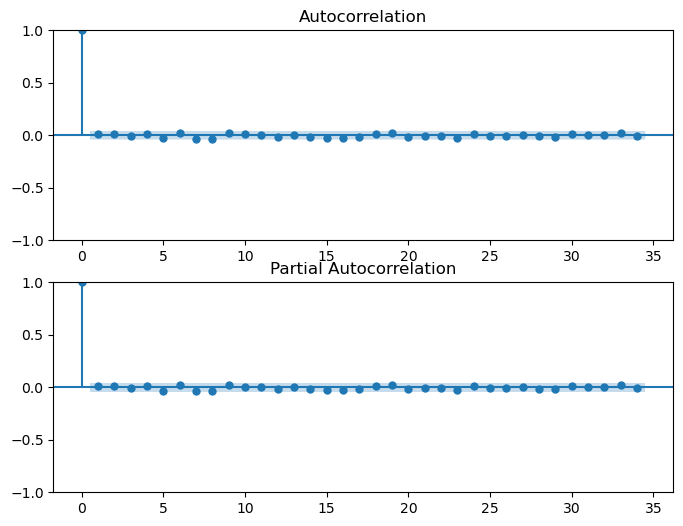

In [152]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(X, ax=ax[0])
plot_pacf(X, ax=ax[1])
plt.show()

In [158]:
X = NASDAQ['Adj Close'].diff().dropna()
X.head()

2025-01-23 00:01:00     7.375000
2025-01-23 00:02:00    -3.171875
2025-01-23 00:03:00    16.250000
2025-01-23 00:04:00     7.349609
2025-01-23 00:05:00    10.906250
Freq: min, Name: Adj Close, dtype: float64

In [154]:
model = sm.tsa.ARIMA(X, order=(1, 0, 1))  
fit_model = model.fit()
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2324
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9709.874
Date:                Sun, 02 Feb 2025   AIC                          19427.748
Time:                        00:11:08   BIC                          19450.752
Sample:                    01-23-2025   HQIC                         19436.130
                         - 01-24-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0942      0.554     -0.170      0.865      -1.180       0.992
ar.L1          0.0884      2.552      0.035      0.972      -4.914       5.090
ma.L1         -0.0778      2.554     -0.030      0.9

In [139]:
from arch import arch_model

# Modèle GARCH(1,1)
garch_model = arch_model(NDX, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()
print(garch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8951.24879753552
Iteration:      2,   Func. Count:     15,   Neg. LLF: 6798.027761602907
Iteration:      3,   Func. Count:     24,   Neg. LLF: -2581.277770191268
Iteration:      4,   Func. Count:     29,   Neg. LLF: -2581.115534538937
Iteration:      5,   Func. Count:     35,   Neg. LLF: -2581.4812692441546
Iteration:      6,   Func. Count:     40,   Neg. LLF: -2581.651059061749
Iteration:      7,   Func. Count:     45,   Neg. LLF: -811.9922951544936
Iteration:      8,   Func. Count:     51,   Neg. LLF: -1576.1410023059905
Iteration:      9,   Func. Count:     57,   Neg. LLF: 29407197100608.68
Iteration:     10,   Func. Count:     68,   Neg. LLF: 2424542536.8798466
Iteration:     11,   Func. Count:     76,   Neg. LLF: 46755.94183347108
Iteration:     12,   Func. Count:     82,   Neg. LLF: 28779.399457845604
Iteration:     13,   Func. Count:     88,   Neg. LLF: 6787.936945118705
Iteration:     14,   Func. Count:     98,   Neg. LLF: 2

C:\ProgramData\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.006349. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [140]:
returns_scaled = NDX * 10  # ou * 100
garch_model_scaled = arch_model(returns_scaled, vol='Garch', p=1, q=2,dist='t')
garch_fit_scaled = garch_model_scaled.fit()
print(garch_fit_scaled.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: 78115.1043603494
Iteration:      2,   Func. Count:     19,   Neg. LLF: 33596.592983111725
Iteration:      3,   Func. Count:     27,   Neg. LLF: 6308.9615559276735
Iteration:      4,   Func. Count:     35,   Neg. LLF: 32226.42000168446
Iteration:      5,   Func. Count:     43,   Neg. LLF: 5028.2616042431655
Iteration:      6,   Func. Count:     51,   Neg. LLF: 4445.793579712017
Iteration:      7,   Func. Count:     59,   Neg. LLF: 4088.850942820556
Iteration:      8,   Func. Count:     67,   Neg. LLF: 3990.945335134054
Iteration:      9,   Func. Count:     75,   Neg. LLF: 4059.816749190205
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1651.8526059708026
Iteration:     11,   Func. Count:     91,   Neg. LLF: 1689.5093232410181
Iteration:     12,   Func. Count:     99,   Neg. LLF: 1647.654982831392
Iteration:     13,   Func. Count:    107,   Neg. LLF: 1580.598361424858
Iteration:     14,   Func. Count:    115,   Neg. LLF: 1474.0

In [93]:
NDX_S = NDX * 100
egarch_model = arch_model(NDX_S, vol='EGARCH', p=1, q=1, dist='t')
egarch_fit = egarch_model.fit()
print(egarch_fit.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 8591.007686182007
Iteration:      2,   Func. Count:     17,   Neg. LLF: 18794.206513695193
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2415.228688546522
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1102.7608116271704
Iteration:      5,   Func. Count:     42,   Neg. LLF: 95543.06318517415
Iteration:      6,   Func. Count:     50,   Neg. LLF: 1101.7874907833793
Iteration:      7,   Func. Count:     57,   Neg. LLF: 1101.0228869585908
Iteration:      8,   Func. Count:     63,   Neg. LLF: 1100.9783324365828
Iteration:      9,   Func. Count:     69,   Neg. LLF: 1100.9562615682637
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1100.9541744578246
Iteration:     11,   Func. Count:     81,   Neg. LLF: 1100.9540649378312
Iteration:     12,   Func. Count:     87,   Neg. LLF: 1100.9540628865188
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1100.9540628865188
Optimization terminated successfully    (Exit mode 0)


In [ ]:
pd.read